# Analysing Spoofed files in dev set - version 1.0 dataset

## TODO

 * Draw scatter plot of posteriors for our best CNN system to project the distribution of genuine and spoofed features
 * Do this for Development and evaluation set.
 * On Evaluation set you could do this plot seperately for different Replay configurations (total 57 will be too much though)

# Summary of file list for spoofed and genuine files in Development set for analysis

## 1) The top 10 spoofed confident correctly classified files : high scores

                               Gen prob     Spf Prob      Log Liklihood ratio
    



In [342]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

%matplotlib inline

In [343]:
%%bash
pwd

/homes/bc305/myphd/stage2/deeplearning.experiment1/Analysing_CNN/working_version/interspeech2018_v1.0/analysing_antispoofing_systems


In [344]:
# Load the prediction file
# Predictions file that has three columns: genuin, spoofed prob and log likehood ratio

pred_file='model_3sec_relu_0.5_run9/predictions/dev_prediction.txt'

In [345]:
all_predictions = []
all_gens = []
all_spoofs = []

with open(pred_file) as f:
    all_predictions = [line.strip() for line in f]
    
all_gen_predictions = all_predictions[:760]                    # first 760 files in dev are genuine
all_spf_predictions = all_predictions[760:]                  # files from 761-1710 are spoofed examples

In [346]:
all_scores = []

with open(pred_file) as f:
    all_scores = [line.strip().split(' ')[2] for line in f]
    
all_gen_scores = all_scores[:760]
all_spf_scores = all_scores[760:]

In [347]:
print(len(all_gen_scores))
print(len(all_spf_scores))

760
950


In [348]:
print(all_spf_scores[0:10])

['-2.83281', '-7.64409', '-3.26421', '-6.31593', '-2.92779', '-2.84944', '1.07997', '-4.83926', '-2.60436', '-1.15522']


In [349]:
spf_sort_index = np.argsort(all_spf_scores)

## Prepare file-list for top spoofed files

In [350]:
# We select all those spoofed files that got spoofed probability > 90% (We gave selection criterion score<-0.3). 
# Print the results, its fine for now. 

fname='index_file_list/allSpoofIndexList_TP.txt'
f=open(fname,'w')

spfFileList = list()
count=0

for i in spf_sort_index:
    score= all_spf_predictions[i].strip().split(' ')[2]
    if float(score) < -3.0:    #-10.0:
        spfFileList.append(str(i) + ' ' + str(all_spf_predictions[i]))
        count += 1
print('Total count = ',count)

# Reverse sort the list- so that spoofed files with highest spoof probability are on top
sorted_spfList = spfFileList[::-1]
for line in sorted_spfList:
    f.write(line+'\n')
    #print(line)
f.close()


Total count =  732


In [351]:
%%bash
cat index_file_list/allSpoofIndexList_TP.txt | head

774 4.90329e-05 0.999951 -9.92297
453 5.43053e-05 0.999946 -9.82084
778 5.52737e-05 0.999945 -9.80316
846 5.56122e-05 0.999944 -9.79705
242 5.65276e-05 0.999943 -9.78073
796 5.78849e-05 0.999942 -9.757
438 5.90267e-05 0.999941 -9.73746
891 6.18739e-05 0.999938 -9.69035
692 6.5861e-05 0.999934 -9.6279
548 6.70555e-05 0.999933 -9.60992


***Point***
> We select all those spoofed files that got spoofed probability > 90%. We have 732 spoofed files that we can use SLIME to get a reliable estimate for what the CNN might have learned about the spoofed class. Note that when running slime, for many files the SLIME returns no explanation coz we are only returning positive instance explanation. Thus we remove those files.

> Therefore, these spoofed files have been classified with > 90% probability of being spoofed

## 1) Printing few top spoofed confident correctly classified files - high scores

    Gen prob     Spf Prob      Log Liklihood ratio
    
    882 3.94339e-06 0.999996 -12.4435
    263 7.61047e-06 0.999992 -11.786
    248 1.53493e-05 0.999985 -11.0844
    914 2.05395e-05 0.999979 -10.7931
    819 2.77295e-05 0.999972 -10.493
    787 3.20235e-05 0.999968 -10.349
    837 3.24263e-05 0.999968 -10.3365
    818 3.27746e-05 0.999967 -10.3258
    262 3.32321e-05 0.999967 -10.312
    883 3.81902e-05 0.999962 -10.1729
    873 3.82485e-05 0.999962 -10.1714
    204 4.20166e-05 0.999958 -10.0774
    249 4.28462e-05 0.999957 -10.0579

## Analysing Time: The top two components from SLIME - True positive Spoofed case

Note, that under time analysis, we have cut our input spectrogram into 10 different temporal components/segments, where each segment correpsonds to

> ***300 mili seconds***

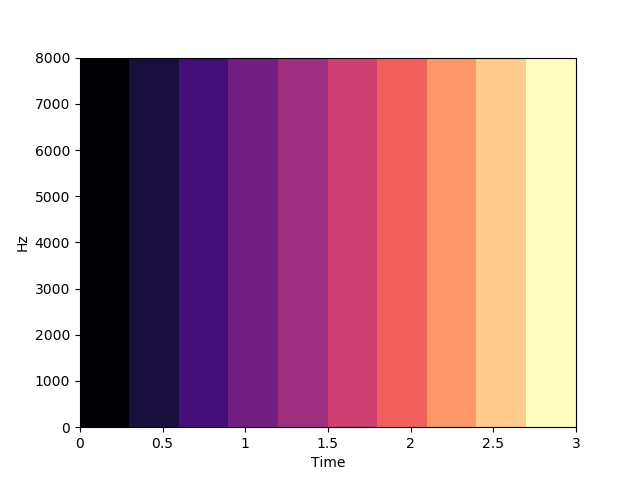

In [352]:
# Show how we cut the spectrogram in timexfrequency

Image("time.png")

In [353]:
file = 'top_two_explanation_indices/time/spoof_TP.txt'

In [354]:
%%bash
cat top_two_explanation_indices/time/spoof_TP.txt  | head

0 6
1 0
1 7
0 1
8 6
1 0
5 6
1 -999
0 -999
0 -999


In [355]:
def get_top1_top2_list(file):
    with open(file) as f:
        top1 = [int(line.strip().split(' ')[0]) for line in f]
    with open(file) as f:  
        top2 = [int(line.strip().split(' ')[1]) for line in f if int(line.strip().split(' ')[1]) != -999]
    return top1, top2    

In [356]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [357]:
print(len(top1))
print(len(top2))

466
280


In [358]:
print(top2)

[6, 0, 7, 1, 6, 0, 6, 5, 3, 1, 3, 1, 2, 4, 7, 8, 5, 2, 8, 7, 1, 8, 7, 1, 1, 8, 6, 9, 4, 5, 1, 1, 8, 1, 7, 6, 6, 7, 8, 6, 8, 2, 2, 6, 2, 1, 0, 2, 7, 1, 9, 8, 6, 7, 1, 6, 1, 1, 8, 1, 7, 0, 1, 8, 9, 1, 1, 7, 1, 2, 5, 5, 1, 6, 1, 1, 1, 7, 9, 6, 9, 3, 8, 8, 8, 3, 8, 5, 9, 9, 8, 6, 8, 8, 0, 1, 8, 8, 7, 5, 7, 7, 2, 1, 8, 7, 9, 8, 1, 6, 1, 7, 6, 0, 5, 1, 2, 7, 8, 7, 1, 2, 2, 1, 8, 8, 6, 5, 7, 6, 2, 1, 7, 9, 0, 6, 8, 1, 2, 1, 1, 1, 6, 1, 4, 0, 8, 1, 7, 1, 6, 1, 2, 7, 7, 9, 1, 0, 1, 1, 7, 6, 4, 0, 5, 0, 3, 9, 3, 3, 8, 1, 6, 7, 1, 8, 7, 7, 1, 7, 1, 8, 1, 7, 1, 8, 2, 0, 0, 1, 0, 1, 7, 0, 4, 1, 7, 1, 6, 5, 9, 0, 9, 1, 1, 2, 6, 1, 7, 0, 1, 7, 1, 7, 1, 7, 8, 7, 1, 7, 1, 9, 7, 0, 7, 9, 2, 2, 7, 7, 4, 9, 5, 0, 3, 8, 1, 1, 0, 8, 8, 1, 0, 0, 8, 9, 6, 1, 8, 9, 2, 2, 8, 0, 3, 9, 2, 8, 2, 1, 2, 0, 6, 8, 3, 7, 2, 8, 8, 7, 1, 8, 1, 1, 7, 7, 8, 1, 0, 7]


In [359]:
def get_counts(datalist, key):
    count=0
    for i in range(0,len(datalist)):
        if datalist[i] == key:
            count+=1
    return count            

In [360]:
def print_component_distribution(comps, predList, order):
    print('Printing component weigting distribution for Top:', order)
    for i in comps:
        print('Component ' + str(i) + ' : ' + str(get_counts(predList, i)))    

### Using the top1 components - given by SLIME (Time segmentation)

> For ***run1*** we get following distribution:

    

In [361]:
comps=[0,1,2,3,4,5,6,7,8,9]    # In time we have 10 segments/components

In [362]:
# Print distribution on top1
order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 169
Component 1 : 101
Component 2 : 26
Component 3 : 6
Component 4 : 8
Component 5 : 12
Component 6 : 31
Component 7 : 63
Component 8 : 33
Component 9 : 17


*** Observation ***
> Top1 predictions favours the **first 300ms**. We get 169 votes from slime, which is heavily dominating other components as seen above. May be this has got to do with the initial DTMF tone, cause, in genuine files also we get first 300ms as highest predictor. Need to hear many audio examples to confirm this case.

*** Also on V2.0 case***
 * Top1 predictions favours the **first 300ms**. We get 234 votes from slime, which is heavily dominating other components as seen above.

### Using the top2 components - given by SLIME (Time segmentation)

> For ***Run1*** we get following distribution


In [363]:
# Print distribution on top2

#order = 2
#print_component_distribution(comps, top2, order)

*** Observation***
> Top2 gives highest favour for component 2 (69) that corresponds to 600ms. 

 * We get the same 69 for component 2 in v2.0 also !!!

In [364]:
# Get those file index having component 0 in top explanation

key=0

fname='index_file_list/allSpoofIndexList_TP.txt'
with open(fname) as f:
    file_idxs = [line.strip() for line in f]  
    
# Write the top component index to the file and further analysis

fname='top_two_explanation_indices/time/topExplanation_list_spoof_TP.txt'
id4_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==key:    # if top explanation index is 3 (which is actually 4)
        id4_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

### Note: 
> the file topExplanation_list_spoof_TP.txt will have four columns
> The first column denotes file index (index from 0), second and third specifies genuine and spoofed probability, while last specifies the LLR score

### What have we done so far

 1. We took all spoofed files that were correctly classified by CNN. We took files for which spoofed probability is greater than 90% and get 732 files.
 1. Then we applied SLIME. We segmented along time. We partitioned these files in 10 parts, each of 300ms. We then obtained top 2 influencing component index.
 1. We then analysed the explanation index distribution for these 732 files and find that the component 0 give high influence. May be it has got to do with the DTMF tone !! 

## Analysing Freq: The top two components from SLIME - True positive Spoofed

Note, that under frequency analysis, we have cut our input spectrogram into 8 different frequency components/segments, where each segment correpsonds to

> ***1000 Hz frequency***

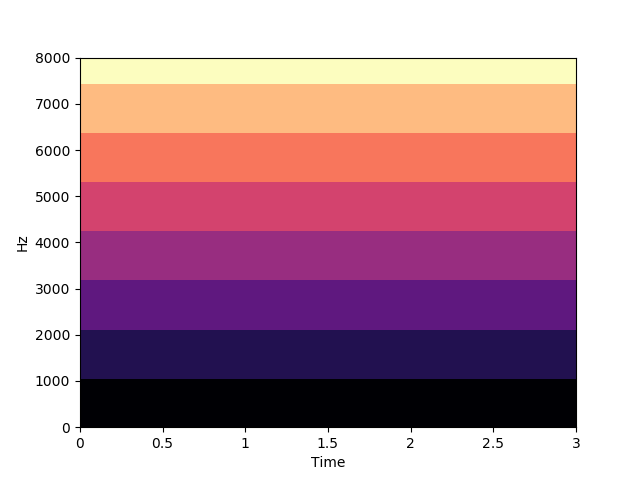

In [365]:
# Show how we cut the spectrogram in timexfrequency

Image("frequency.png")

In [366]:
file = 'top_two_explanation_indices/freq/spoof_TP.txt'

In [367]:
%%bash
cat 'top_two_explanation_indices/freq/spoof_TP.txt' | head

# the top two components 7 6 dominates the explanation

6 0
5 0
6 0
6 0
0 6
6 0
0 3
6 3
0 -999
0 5


In [368]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)

In [369]:
# Top 2 may have -999 that we added when running SLIME. Remove those files in top2

In [370]:
print(len(top1))
print(len(top2))

710
587


## Top 1 component distribution - Frequency

In [371]:
comps = [0,1,2,3,4,5,6,7]   # in Frequency we have 8 components

In [372]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 227
Component 1 : 0
Component 2 : 41
Component 3 : 45
Component 4 : 1
Component 5 : 124
Component 6 : 272
Component 7 : 0


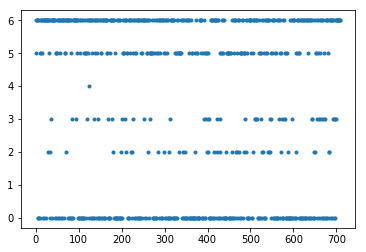

In [373]:
# Plot the distribution
plt.plot(top1,'.')

***Observation: Time segmentation***
> We see that under frequency analysis, the top explanation appears to be favouring frequency bin 7000Hz. The next two frequency information that influences are 1000Hz and 6000Hz.

***Out of total 732 spoofed files***

 1. 272 belongs to 7000Hz
 1. 227 for 1000 Hz
 1. 124 for 6000 Hz


## Top 2 component distribution - Frequency

In [374]:
# Print distribution on top2
#order = 2
#print_component_distribution(comps, top2, order)

In [375]:
# Plot the top2 distribution
#plt.plot(top2,'.')

**NOTE: **
> In SLIME code, as I was returning two indices, for spoofed files SLIME was only returning positive index, which in many cases was only one, therefore, I put -999 as the second value (just not to break the code and make changes)

 * It give more emphasis on component 0, under top2 case

In [376]:
# Get those file index having component8 in top explanation (as for frequency we get top explanation at index8)

top = 6   # Define this value for each case of analysis

fname='index_file_list/allSpoofIndexList_TP.txt'
with open(fname) as f:
    #file_idxs = [int(line.strip().split(' ')[0]) for line in f]
    file_idxs = [line.strip() for line in f]
    
#Write the top component index to the file and further analysis
fname='top_two_explanation_indices/freq/topExplanation_list_spoof_TP.txt'
id8_indexFiles=list() 

f=open(fname,'w')
for i in range(len(top1)):
    if top1[i]==top:    # if top explanation index is 3 (which is actually 4)
        id8_indexFiles.append(file_idxs[i])
        f.write(str(file_idxs[i])+'\n')
        
f.close()

** Observations**


> What has the CNN learned about the genuine and spoofed classes?


## Analysing timexFreq: The top two components from SLIME - True positive Spoofed case

Note, that under timexfrequency analysis, we have cut our input spectrogram into 30 different segments, where each segment correpsonds to

> ***600 msec in time and around 1333 Hz in frequency***

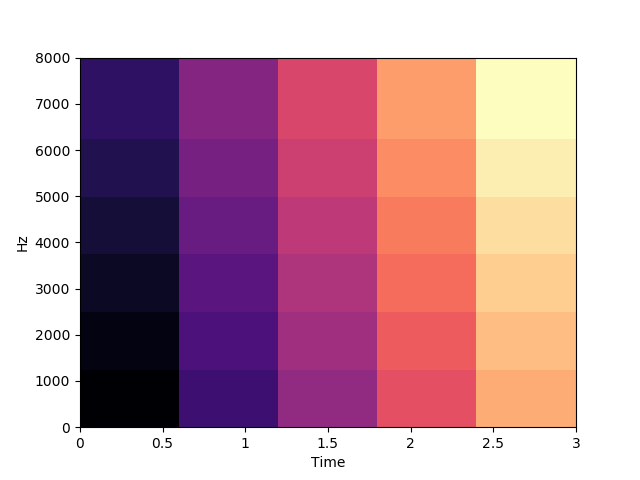

In [377]:
# Show how we cut the spectrogram in timexfrequency

Image("timexfrequency.png")

In [378]:
file = 'top_two_explanation_indices/tf/spoof_TP.txt'

In [379]:
%%bash
cat 'top_two_explanation_indices/tf/spoof_TP.txt' | grep 0 | wc -l
#cat 'top_two_explanation_indices/tf/spoof_TP.txt' 

# the indexes 11,23 and 17 seems to be appearing mostly
# Index 11 occuring - 498 times (in top2)
# Index 23 occurs 204 times in top2 pair
# Index 17 appears 394 times in top2 pair

#16,28,17,9,29,5,23,20,0,18,1

# Component 16 appears 99 times
# Component 28 appears 12 times
# Component 17 appears 19 times
# Component 9 appears 77 times
# Component 29 appears 55 times
# Component 5 appears 300 times
# Component 23 appears 102 times
# Component 20 appears 21 times
# Component 0 appears 208 times

# Note grep looks all appearances. This cound indicates both first and second

209


#### quick note

>  Along timexfrequency analysis

 1. Component 16 appears 99 times
 2. Component 28 appears 12 times
 3. Component 17 appears 19 times
 4. Component 9 appears 77 times
 5. Component 29 appears 55 times
 6. Component 5 appears 300 times
 7. Component 23 appears 102 times
 8. Component 20 appears 21 times
 9. Component 0 appears 208 times

Note grep looks all appearances. This cound indicates both first and second

** Note ** Indexes starts with 0, so 11 here is 12th component 

In [380]:
# Get top1 and top2 in seperate list
top1, top2 = get_top1_top2_list(file)
print(len(top1))
print(len(top2))

732
732


## Top 1 component distribution - time x Frequency

In [381]:
comps = np.arange(0,30)   # in timexfrequency we have 30 components

In [382]:
# Print distribution on top1

order = 1
print_component_distribution(comps, top1, order)

Printing component weigting distribution for Top: 1
Component 0 : 56
Component 1 : 0
Component 2 : 4
Component 3 : 8
Component 4 : 23
Component 5 : 12
Component 6 : 0
Component 7 : 0
Component 8 : 180
Component 9 : 29
Component 10 : 62
Component 11 : 9
Component 12 : 1
Component 13 : 0
Component 14 : 33
Component 15 : 17
Component 16 : 23
Component 17 : 18
Component 18 : 95
Component 19 : 0
Component 20 : 3
Component 21 : 37
Component 22 : 1
Component 23 : 24
Component 24 : 39
Component 25 : 0
Component 26 : 0
Component 27 : 0
Component 28 : 34
Component 29 : 24


*** Observation ***
> Distribution shows highest for Component 5 (180), next for component 10(111), next 1(63) as shown about. This distribution is out of 655 spoofed audio files that were classified with probability greater than 90% as spoofed by the CNN.

## Top 2 component distribution - time x Frequency

In [383]:
# Print distribution on top2

#order = 2
#print_component_distribution(comps, top2, order)

**Observations**

> Under top2, we find component 1 as highest (83)

# Summary - on v1.0 and v2.0 spoofed - considering only top1 explanation

**Time segmentation: v1.0**

> We get first 300ms segment as first top predictor. Coule be DTMF tone !


**Time segmentation: v2.0**

>We segmented spectrogram into 10 super-samples (components), each of 1000ms, and ran SLIME to generate explanations using 5000 samples. We find that among 655 True-positive spoofed files (with probability > 90%), the highest influence is shown for **component 0** that corresponds to **first 300ms**. We get 234 votes from slime.

**Frequency segmentation: v1.0**
> The highest predictor are component 6 followed by component 0. Similarity with v2.0

**Frequency segmentation: v2.0**
> We segmented the spectrograms into 8 different frequency bins, each corresponding to 1000Hz and ran SLIME. In this case, we see that the top explanation appears to be favouring frequency bin 7000Hz. The next two frequency information that influences are 4000Hz and 1000Hz.


> ***NOTE: In genuine case we got highest vote for 8000Hz bin***

**TimexFrequency segmentation: v1.0**
> We get component 8 as the highest predictor. Does not match with what we got on v2.0 though !!

**TimexFrequency segmentation: v2.0**
> We segmented the spectrogram into 30 different timexfrequency bins. We chose 30 to keep our analysis simple. Each component corresponds to 600 msec in time and around 1333 Hz in frequency. 

> Here, the distribution shows highest for **Component 5 (180)** followed by **component 10(111)**. This distribution is out of 655 spoofed audio files that were classified with probability greater than 90% as spoofed by the CNN.

** Correlation between time,frequency and timexfrequency analysis: with respect to v2.0**

> Under time analysis we found that the model is highly influenced for first 300ms signal. This relates to the fact that the model seem to exploit information related to DTMF tone that was used for concatenating the original RedDots genuine signal to create spoofed counterparts. SLIME seems to explain this very fact, as we find 234 votes for the spoofed signals with probability greater than 90%. We may still want to double check this fact by just taking the spoofed files with highest probability !

> Next interesting observation we find is by doing frequency analysis, we see that spoofed class is looking at the high frequency regions mostly. Frequency component 7000 Hz seems to take the lead, this is followed by 4000Hz frequency bin. This means that spoofed class in not heavily relying on speech signal. Need to double check and add further analysis for significant conclusion.

> Further, having done time-frequency analysis together we find component 5 to give highest count. This corresponds to first 6000ms in time and 7998 Hz (1333*6) frequency.


 